## 实验：绘制矩形轮廓边框

### 实验概要

#### 绘制轮廓边框

任何人工智能的宣传片，都会向观众展示计算机视觉的对象检测检测技术。虽然这早已不是什么新鲜事（然而对象检测背后的技术，仍然在不断的创新升级），然而，却能给行外人一种更直观的认知。其中，最让人印象深刻的莫非是围绕检测到的对象，采用一个个方框将其凸显出来。如下图，我们来了解一下这个边框是怎么做出来的。

<img src="./img/7.jpg" width="50%">

到目前为止，您已经了解了如何绘制检测到的轮廓的确切形状。然而，由于事物的轮廓千变万化，根据确切轮廓绘制形状在存在大量检测目标的图像中会让人眼花缭乱。因此，您在实际项目中可能需要做的是另一件事，是在感兴趣的轮廓周围绘制一个直立的矩形边界框。例如，假设您被要求在视频中跟踪正在行驶的汽车。 您要做的第一件事是在视频的所有帧中围绕该汽车绘制一个边界框。同样，人脸检测算法还会在图像中存在的人脸周围绘制边界框。

首先，要在图像的任何区域上绘制边框，您需要掌握以下参数：

- 边框的起始 `x` 坐标
- 边框的起始 `y` 坐标
- 边框的宽度（`w`）
- 边框的高度（`h`）

是不是感觉很熟悉？ —— 没错，跟我们在之前在设置 ROI 区域是所需要的几个参数一样。

<img src="./img/8.jfif" width="50%">

当我们将它们应用到轮廓边框的时候，使用的命令有所不一样。

您可以通过将轮廓传递到 `cv2.boundingRect` 函数中来获取轮廓（要围绕其绘制边界框）的这些参数：

```python
x, y, w, h= cv2.boundingRect(my_contour)
```
例如，要获取第一个从图像中检测到的轮廓（即轮廓列表中 index = 0 处的轮廓）的这些参数：
```python
x,y,w,h = cv2.boundingRect(contours[0])
```
下一步是在图像上绘制这些值，使用 OpenCV 的 `cv2.rectangle` 命令：
```python
cv2.rectangle(img,(x,y), (x+w,y+h), color_code, thickness)
```
此命令将图像左上角的 x 和 y 坐标，以及图像右下角的 x 和 y 坐标（通过宽度和高度可以计算出来）作为输入。还可以根据用户的选择输入颜色代码和轮廓框的粗细值。将方框绘制为蓝色，粗细值为 `5`，代码如下：

```python
cv2.rectangle(with_contours,(x,y), (x+w,y+h),  (255,0,0), 5)
cv2.imshow('contour#1', with_contours)
cv2.waitKey(0)
cv2.destroyAllWindows()
```
输出的图像如下：

<img src="./img/9.jfif" width="50%">

如果要在所有检测到的轮廓周围绘制边界框，可以使用 `for 循环`。 `for 循环` 将遍历所有轮廓，对于每个检测到的轮廓，它将找到 `x`，`y`，`w` 和 `h`，并在该轮廓上绘制矩形边框。

#### 轮廓面积

OpenCV 还为您提供了一些方便的命令来获取轮廓的属性，包括：面积，重心的 x 和 y 坐标，周长，弯矩等。详情可[参考官方文档](https://docs.opencv.org/trunk/dd/d49/tutorial_py_contour_features.html)。

其中，最常用的属性之一是轮廓的面积。要获取轮廓的面积，可以使用以下命令：

```python
contour_area = cv2.contourArea(contour)
```

也可以通过以下命令，检索面积最大的轮廓:

```python
max_area_cnt = max(contour_list, key = cv2.contourArea)
```
同理，通过以下命令，检索面积最小的轮廓：

```python
min_area_cnt = min(contours, key = cv2.contourArea)

```

### 实验目标

在本实验中，您的任务是在检测到篮球网后，在篮球网周围绘制一个矩形边框。

我们将采用的方法是使用阈值将该图像转换为二值图像，从而将篮球网的整个白色区域检测为单个对象，这将是此处面积最大的轮廓。

然后，我们将使用边界框标记此面积最大轮廓（篮球网）。我们要处理的图片如下：

<img src="./img/23.jfif">

完成实验后，您的输出图像应该如下图所示：

<img src="./img/24.jfif">

### 1. 导入依赖库

In [1]:
import cv2                        # 导入OpenCV
import matplotlib.pyplot as plt   # 导入matplotlib

# 魔法指令，使图像直接在Notebook中显示
%matplotlib inline

### 2. 加载图像并保存副本

这是一项预防措施，因此即使您稍后在代码中修改了原始图像，也将保存一份副本，以备日后需要时使用。

In [2]:
# 设置输入输出路径
import os
base_path = os.environ.get("BASE_PATH",'../data/')
data_path = os.path.join(base_path + "lab4/")
result_path = "result/"
os.makedirs(result_path, exist_ok=True)

image = cv2.imread('./data/basketball.jpg') 
imageCopy= image.copy()

### 3. 显示图像

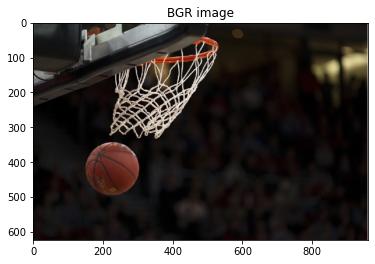

In [3]:
# 在云实验环境下忽略以下代码，避免程序尝试打开系统窗口显示图片；
# 使用matplotlib替换，使图像直接在 Jupyter Notebook 中输出。

# cv2.imshow( 'BGR image' , image )
# cv2.waitKey(0) 
# cv2.destroyAllWindows()

plt.imshow(image[:,:,::-1])  # 将图像从 BGR 转换为 RGB
plt.title('BGR image')       # 指定输出图像的标题
plt.show()                   # 显示图像

如果您是在自己本地使用 `cv2.imshow` 显示图像，按键盘上的任意键可关闭图像窗口，让程序继续执行。

### 4. 转换灰度图像

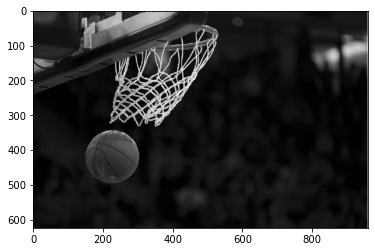

In [4]:
# 将图像转换为灰度图像   
gray_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)      

# cv2.imshow( 'gray' , gray_image )
# cv2.waitKey(0) 
# cv2.destroyAllWindows()

# 使用灰色“喷涂”图像输出显示
plt.imshow(gray_image, cmap='gray')                  
# 显示图像
plt.show()                                           

### 5. 图像二值化

使用阈值将此灰度图像转换为二值图像，以便将篮球网的整个白色边界区域检测为单个斑点。

通过反复试验，我们发现 `100` 为最佳阈值，在这种情况下，将图像转换为二值图像。

如果您发现其他阈值效果更好，请使用具有更好效果的阈值。

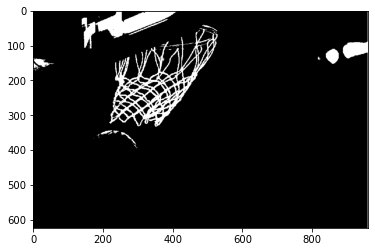

In [6]:
# 直接输入阈值与最大值，执行图像二值化
ret,binary_im = cv2.threshold(gray_image, 120, 255, cv2.THRESH_BINARY) 

# 无需反转图像
# binary_im= ~binary_im

# 在云实验环境下忽略以下代码，避免程序尝试打开系统窗口显示图片；
# 使用matplotlib替换，使图像直接在 Jupyter Notebook 中输出。

# cv2.imshow( 'binary' , binary_im )
# cv2.waitKey(0) 
# cv2.destroyAllWindows()

plt.imshow(binary_im, cmap='gray') # 使用灰色“喷涂”图像输出显示
plt.show()                         # 显示图像

### 6. 检测轮廓

这里需要注意的是，我们使用了 `cv2.CHAIN_APPROX_SIMPLE` 选项，它将返回绘制每一个轮廓时，所必须要用到的点的坐标，储存 `contours` 轮廓列表中。这在我们后面使用 `for` 循环进行参数查找提供了查询途径。

In [8]:
# 检测图像中的所有轮廓
# 使用cv2.RETR_TREE选项，从而获取涵盖轮廓整个家族的详细族谱
# 使用cv2.CHAIN_APPROX_SIMPLE选项，记录绘制每一个轮廓时，所必须要用到的点的坐标
contours,hierarchy = cv2.findContours(binary_im,
                                      cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE) 

print(len(contours))    # 输出检测到的轮廓数量
# print(contours)

279


### 7. 绘制轮廓

在图像上绘制所有检测到的轮廓，然后显示图像，使用以下代码以绿色绘制所有轮廓。

其中，轮廓粗细值设置为 `-1` 可以使绘制的轮廓用颜色填充，以获得更好的视觉显示效果。

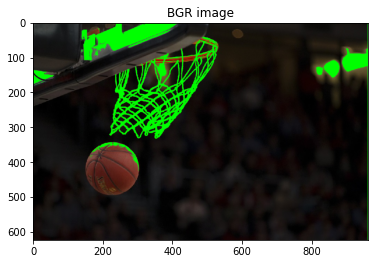

In [7]:
# 这里的格式与之前我们在检测轮廓时候使用的有点区别
# 之前实验中，我们用一条独立命令完成全部参数的输入
# 在这里我们先定义了需要输入的参数数值
# 之后在cv2.drawContours命令中引用对应的参数
# 设置检测图像的所有轮廓
contours_to_plot= -1                                   
# 设置轮廓颜色为绿色BGR(0,255,0) 
plotting_color= (0,255,0)                              
# 设置轮廓粗细值为-1，使轮廓全部使用绿色填充  
thickness= -1                                          


# 应用以上参数数值输入到cv2.drawContours命令中进行轮廓检测
with_contours = cv2.drawContours(image,contours,
            contours_to_plot, plotting_color,thickness=thickness)

# 在云实验环境下忽略以下代码，避免程序尝试打开系统窗口显示图片；
# 使用matplotlib替换，使图像直接在 Jupyter Notebook 中输出。

# cv2.imshow( 'contours' , with_contours )
# cv2.waitKey(0) 
# cv2.destroyAllWindows()

plt.imshow(image[:,:,::-1])  # 将图像从 BGR 转换为 RGB
plt.title('BGR image')       # 指定输出图像的标题
plt.show()                   # 显示图像

### 8. 绘制矩形轮廓边框

`contours` 存储了所有在图像中检测到的轮廓的信息，从 `0` 开始索引排列，譬如：下面是第一个轮廓的信息。

In [8]:
print(contours[0])

[[[160 389]]]


同时，因为之前我们在检测轮廓是选择了 `cv2.CHAIN_APPROX_SIMPLE`，它将返回绘制每一个轮廓的点的坐标到 `contours` 轮廓列表中。譬如：下面是需要绘制最后一个轮廓的点的坐标信息。

In [9]:
# 从之前输出检测到的轮廓数量的命令中，我们知道共有324个轮廓。
print(contours[323]) 

[[[367  30]]

 [[368  29]]

 [[370  29]]

 [[371  30]]

 [[370  31]]

 [[369  31]]

 [[368  32]]

 [[366  32]]

 [[365  31]]

 [[366  30]]]


因此，我们可以使用 `for` 循环，按照 `contours` 轮廓列表索引号码，逐个读取轮廓编号；根据编号传递到 `cv2.boundingRect` 函数，获取绘制矩形轮廓边框所需要的：X / Y / W / H 参数 ——  直到读取 `contours` 轮廓列表索引的最后一个号码，循环结束，同时绘制结束。

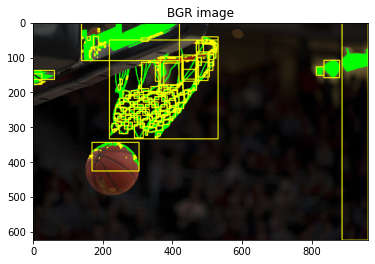

In [10]:
# 创建contours轮廓列表索引号码的for循环
for cnt in contours:
    # 轮廓传递到cv2.boundingRect函数中来获取每一个轮廓的x/y/w/y参数
    x,y,w,h = cv2.boundingRect(cnt)                                
    # 每次获取到x/y/w/y参数后，使用cv2.rectangle在图像上绘制矩形框
    image = cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,255),2)     
    
# 在云实验环境下忽略以下代码，避免程序尝试打开系统窗口显示图片；
# 使用matplotlib替换，使图像直接在 Jupyter Notebook 中输出。

# cv2.imshow( 'contours' , image )
# cv2.waitKey(0) 
# cv2.destroyAllWindows()

plt.imshow(image[:,:,::-1])  # 将图像从 BGR 转换为 RGB
plt.title('BGR image')       # 指定输出图像的标题
plt.show()                   # 显示图像

### 9. 搜索面积最大的轮廓

很明显我们不需要上面那么多的轮廓边框，只需要保留面积最大的那个 —— 篮球网的轮廓边框即可。因此，使用 `cv2.contourArea` 查询具有最大面积的轮廓，之后通过迭代，在一开始保存的原始图片副本 `imageCopy` 上，重新给篮球网绘制矩形轮廓边框。

In [11]:
# 检索面积最大的轮廓
required_contour = max(contours, key = cv2.contourArea)             

# 根据返回结果（轮廓索引号），找到起始x和y坐标
# 以及应包围此最大轮廓的矩形边界框的宽度和高度
x,y,w,h = cv2.boundingRect(required_contour) 

# 在之前保存的原始彩色图像的副本上绘制此边界框
img_copy2 = cv2.rectangle(imageCopy,(x,y),(x+w,y+h),(0,255,255),2)

最后，显示图像，看到篮球网已经被检测出来，并且在其周围绘制了矩形边框。

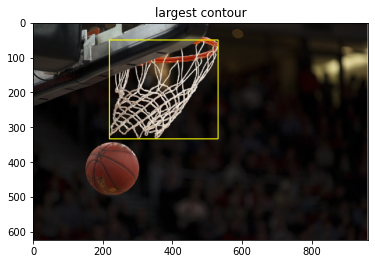

In [12]:
# 在云实验环境下忽略以下代码，避免程序尝试打开系统窗口显示图片；
# 使用matplotlib替换，使图像直接在 Jupyter Notebook 中输出。

# cv2.imshow( 'largest contour' , img_copy2)
# cv2.waitKey(0) 
# cv2.destroyAllWindows()

plt.imshow(img_copy2[:,:,::-1])    # 将图像从 BGR 转换为 RGB
plt.title('largest contour')       # 指定输出图像的标题
plt.show()                         # 显示图像

### 实验小结

在本实验中，我们学习了如何应用轮廓检测来检测实物，通过一个非常简单的特征（最大面积轮廓）找到篮球网的位置。

并且，在篮球网的周围绘制了一个矩形轮廓边框。